In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import model_selection
from sklearn import tree
import graphviz

In [2]:
iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target
df['flower_species'] = df.target.apply(lambda x : iris.target_names[x])
print('Unique target values=',df['target'].unique())

df.sample(5)

Unique target values= [0 1 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_species
120,6.9,3.2,5.7,2.3,2,virginica
17,5.1,3.5,1.4,0.3,0,setosa
109,7.2,3.6,6.1,2.5,2,virginica
24,4.8,3.4,1.9,0.2,0,setosa
145,6.7,3.0,5.2,2.3,2,virginica


In [3]:
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df[['target']]

In [4]:
X_train,X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size= 0.2, random_state= 1)

In [5]:
model = tree.DecisionTreeClassifier(random_state= 1)
model.fit(X_train ,y_train)

DecisionTreeClassifier(random_state=1)

In [6]:
model.score(X_test, y_test)

0.9666666666666667

[Text(0.4, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.5, 0.75, 'x[3] <= 1.65\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(0.2, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.3, 0.4166666666666667, 'x[0] <= 6.05\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.2, 0.25, 'x[3] <= 1.55\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.5833333333333334, 'x[2] <= 4.85\ngini = 0.048\nsamples = 41\nvalue = [0, 1, 40]'),
 Text(0.7, 0.4166666666666667, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]

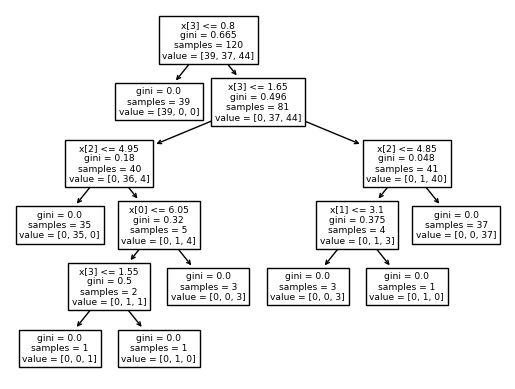

In [7]:
tree.plot_tree(model)

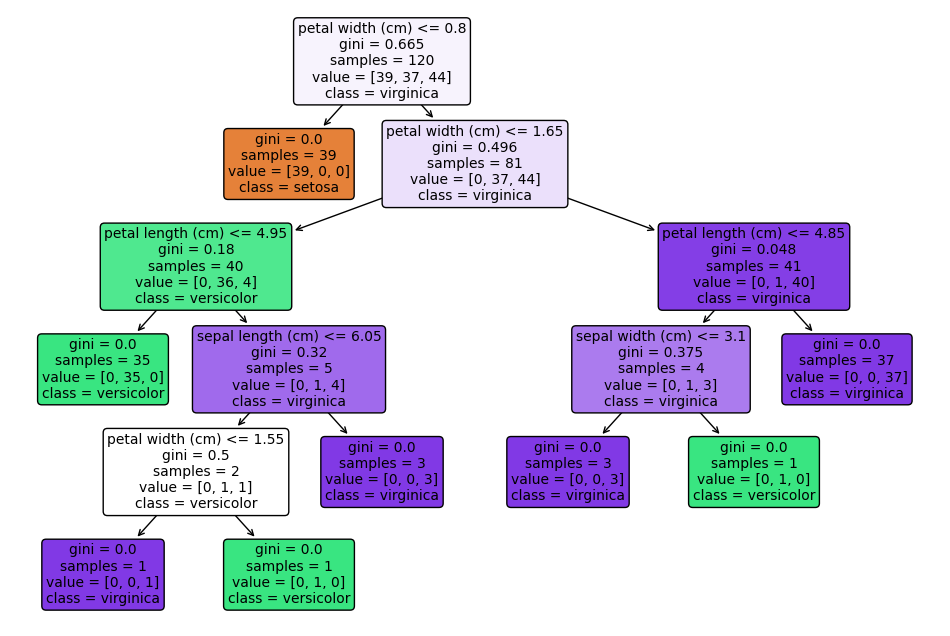

In [11]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(12, 8))
tree.plot_tree(
    model,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()


# Задача
Подобрать значения гиперпараметров модели criterion, max_depth, min_samples_leaf с помощью перебора по сетке.

In [12]:
import pandas as pd
from sklearn import datasets, model_selection, tree

In [13]:
df['target'] = iris.target

# Формирование признаков и целевой переменной
X = df[iris.feature_names]
y = df['target']

In [14]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.2, random_state=1)

In [15]:
# Сетка гиперпараметров
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4]
}

In [16]:
# Настройка GridSearchCV
clf = tree.DecisionTreeClassifier(random_state=1)
grid_search = model_selection.GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=True
)

In [17]:
# Обучение и поиск лучших параметров
grid_search.fit(X_train, y_train)

# Вывод лучших параметров и результата
print("Best parameters:", grid_search.best_params_)
print("Best CV accuracy:", grid_search.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1}
Best CV accuracy: 0.9666666666666668


# Вывод:

Лучшей (дающей наибольшую среднюю точность на валидации) оказалась модель с критерием деления «gini», без ограничения глубины (max_depth=None) и с минимальным числом листьев в узле равным 1.

Средняя accuracy (~96.7 %) 

In [18]:
# Вывод полной таблицы результатов
results_df = pd.DataFrame(grid_search.cv_results_)[['params', 'mean_test_score', 'std_test_score']]
print("\nGrid Search Results:")
results_df


Grid Search Results:


,params,mean_test_score,std_test_score
0,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.966667,0.016667
1,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.933333,0.033333
2,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.933333,0.033333
3,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.933333,0.033333
4,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.916667,0.037268
5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.916667,0.037268
6,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.916667,0.037268
7,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.916667,0.037268
8,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.933333,0.033333
9,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.933333,0.033333


Таблица результатов позволяет сравнить все испробованные варианты: чем выше mean_test_score и чем ниже std_test_score, тем более надёжной и точной считается соответствующая конфигурация.